# Import Modules

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
import keras
%matplotlib inline
nltk.download('stopwords')
warnings.filterwarnings('ignore')

# Loading the Dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head()

# Data Preprocessing

In [6]:
# drop unnecessary columns
df = df.drop(columns=['id','title','author'],axis=1)

In [7]:
# drop null values
df = df.dropna(axis=0)

In [8]:
len(df)

20761

In [9]:
#Remove special characters and punctuations
#Step 1: Lower the text 
df['clean_news'] = df['text'].str.lower()
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

In [10]:
#Step 2 : Remove uneccesary characters

df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')
df['clean_news']

0        house dem aide we didnt even see comeys letter...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29 2...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t i unloaded on black celebrities who m...
20796    when the green bay packers lost to the washing...
20797    the macys of today grew from the union of seve...
20798    nato russia to hold parallel exercises in balk...
20799     david swanson is an author activist journalis...
Name: clean_news, Length: 20761, dtype: object

In [11]:
#Remove Stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october 29 2016 tension ...
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


# Exploratory Data Analysis

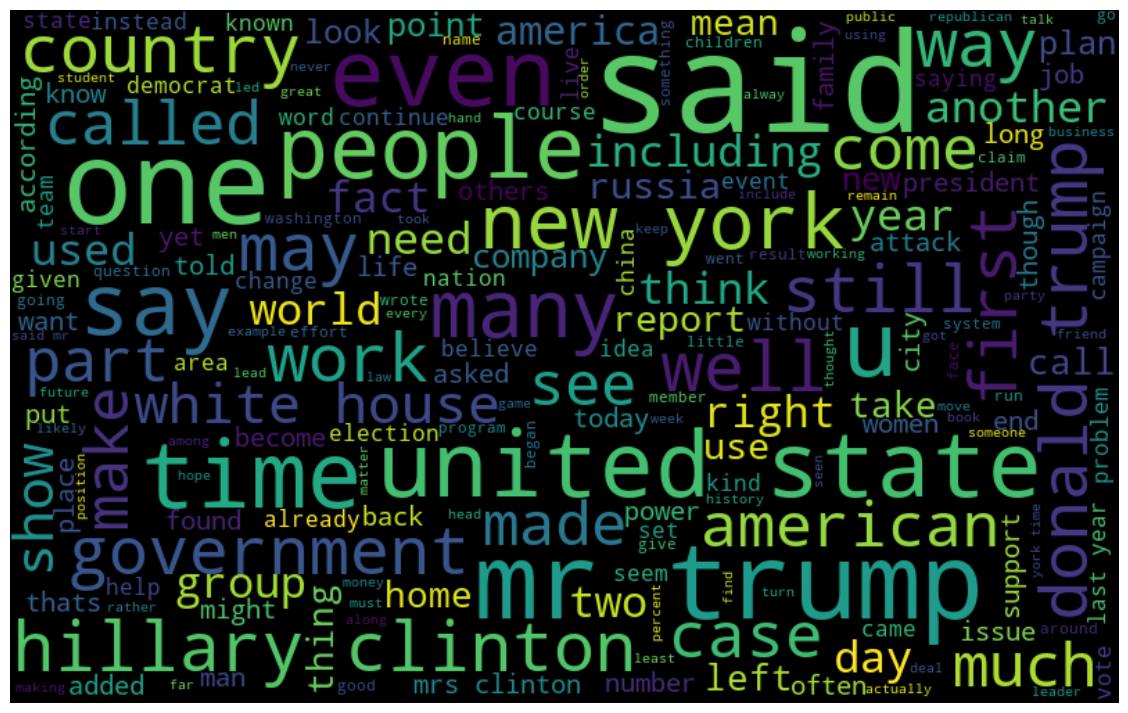

In [12]:
#lets visualize the frequent used words

all_words = " ".join([sentence for sentence in df['clean_news']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Lets plot the graph

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

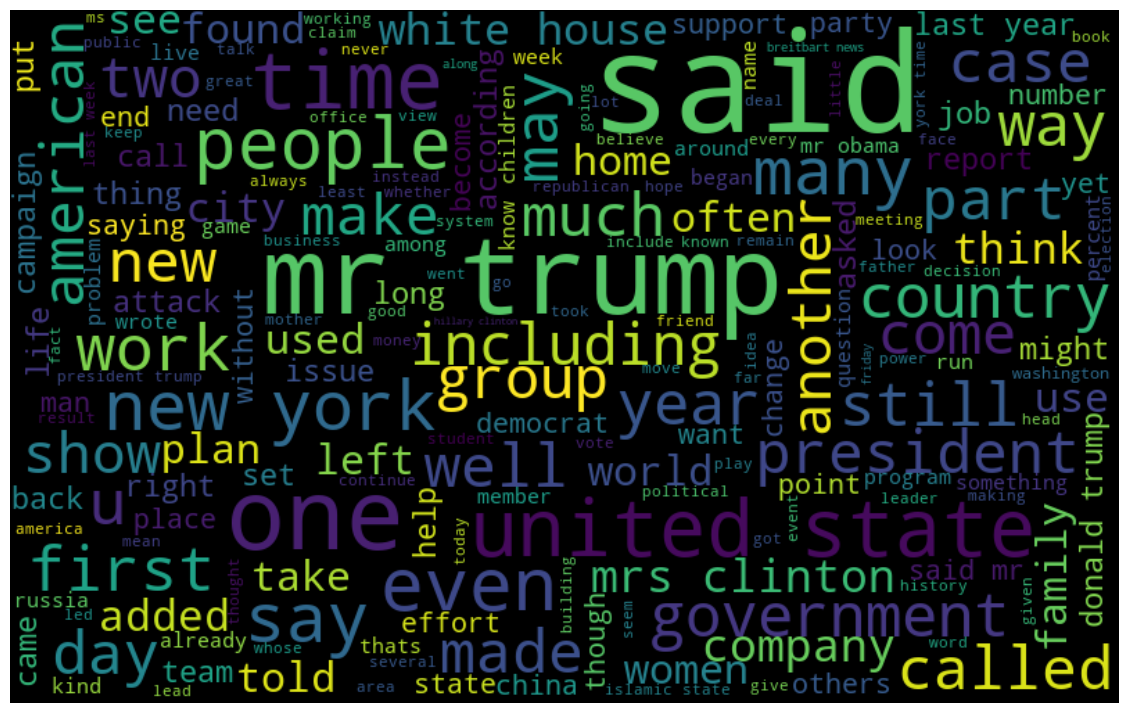

In [13]:
# We will visualize the frequent words in genuine news

all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Lets plot the graph

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

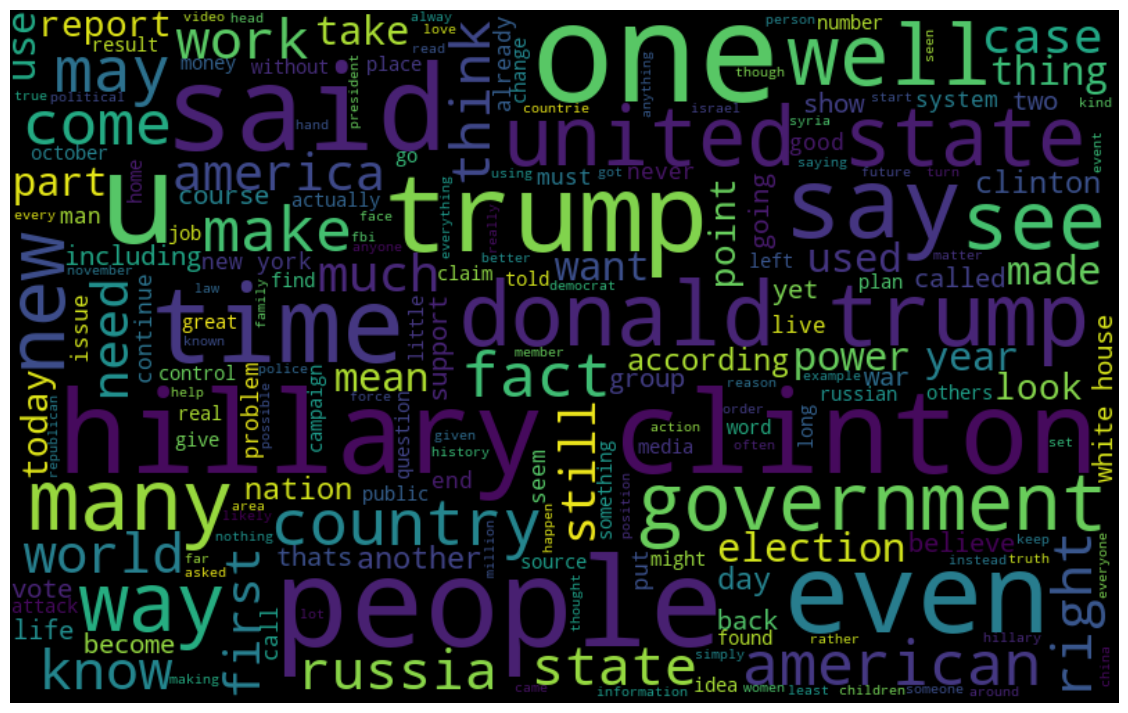

In [14]:
# We will visualize the frequent words in fake news

all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Lets plot the graph

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create Word Embeddings

In [15]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [16]:
#We need to tokenize the words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

199536

In [17]:
# Lets pad the data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [19]:
#We need to create embedded index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [21]:
#Lets create  a embedding matrix

embedding_matrix = np.zeros((vocab_size+1,100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [30]:
embedding_matrix[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Input Split

In [23]:
padded_seq[1]

array([   258,     28,   1557,     92,   4913,  27340,    415,   2246,
         2067,    377,    532,   1558,   5339,     29,     12,    796,
          179,    361,   1917,  17459,    829,  20147,   2990,   2626,
          640,    747,    252,   2025,   3113,  10995,    125,     39,
         2086,  78618,   3022,   3646,   3561,   3113,    835,    153,
         3458,     29,   9775,  51963,   3724,     18,    218,     20,
         3234,  20147,  10024,    625,     11,    481,   2494,   2417,
         8173,    442,    701,    613,    147,     14,  22280,    902,
          324,      8,    164,   3712,     60,  11541,    867,   2644,
           16,    864,   4422,    176,   5305,   2086,   4253,     40,
          257,    835,    192,     10,   2403,     10,   2086,   9775,
           58,   8372,  11246, 104297,  20952,   3713,  20953,  78619,
       104298,   5459,  31169,  25044,   7998,  19120,  65806,   4403,
          168,    261,  25045,   4403,    162,    355,    904,   1581,
      

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

# Model training

In [26]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    Embedding(vocab_size+1,100,weights=[embedding_matrix],trainable = False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         19953700  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20,104,229
Trainable params: 150,529
Non-t

In [29]:
#Let's train the model
history = model.fit(x_train, y_train, epochs=20, batch_size = 256, validation_data=(x_test,y_test))

Epoch 1/20
65/65 [==============================] - 401s 6s/step - loss: 0.6191 - accuracy: 0.6674 - val_loss: 0.6434 - val_accuracy: 0.5890
Epoch 2/20
65/65 [==============================] - 403s 6s/step - loss: 0.6165 - accuracy: 0.6479 - val_loss: 0.6005 - val_accuracy: 0.6571
Epoch 3/20
65/65 [==============================] - 402s 6s/step - loss: 0.6000 - accuracy: 0.6802 - val_loss: 0.5616 - val_accuracy: 0.7310
Epoch 4/20
65/65 [==============================] - 430s 7s/step - loss: 0.5417 - accuracy: 0.7274 - val_loss: 0.5247 - val_accuracy: 0.7616
Epoch 5/20
65/65 [==============================] - 379s 6s/step - loss: 0.5195 - accuracy: 0.7291 - val_loss: 0.5161 - val_accuracy: 0.6812
Epoch 6/20
65/65 [==============================] - 372s 6s/step - loss: 0.5367 - accuracy: 0.7168 - val_loss: 0.5490 - val_accuracy: 0.6590
Epoch 7/20
65/65 [==============================] - 377s 6s/step - loss: 0.5367 - accuracy: 0.7272 - val_loss: 0.5031 - val_accuracy: 0.7623
Epoch 8/20
65

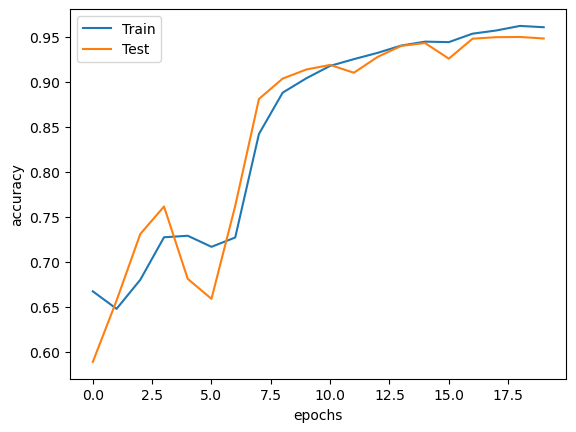

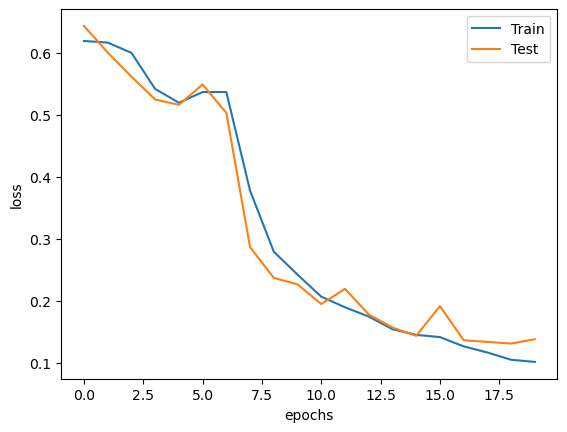

In [33]:
#Let's visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

# Deploying the Model

In [1]:
x_test.head()

NameError: name 'x_test' is not defined

In [34]:
#Saving the model
import pickle
filename = 'model.sav'
pickle.dump(history, open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://ff287005-412b-4a50-9b25-3c96c59807a1/assets


INFO:tensorflow:Assets written to: ram://ff287005-412b-4a50-9b25-3c96c59807a1/assets


In [ ]:
#Load the model
load_model = pickle.load(open(filename,'rb'))